<center><font size='6px' color='#DC143C'><b>Classification des Tweets </b></font>

<div style="font-size: 23px;font-family: Times New Roman;color: DarkRed"><em><strong>Introduction</strong></em></div>

<p style="font-size: 18px;font-family: Times New Roman">Dans nos jours, avec l'explosion du Big Data, il existe une forte demande pour les organisations et les scientifiques des données pour effectuer l'extraction d'informations à l'aide de sources de données non traditionnelles. Des recherches ont montré que près de 80% des données existent sous forme de données textuelles non structurées, par conséquent, l'analyse de texte est fondamentale pour analyser la richesse des informations disponibles sur les transcriptions de chat, les publications sur les réseaux sociaux, les critiques, les fils d'actualité, etc.

<p style="font-size: 20px;font-family: Times New Roman;color: #000000"><strong>objectifs: </strong></p>

<ul>
  <li>Maitriser l’API de twitter pour l’extraction des tweets</li>
  <li>Maitriser la partie NLP (natural language processing) avec NLTK en Python</li>
  <li>Appliquer les principes de nettoyage des données</li>
  <li>Classer les tweets : regrouper ensemble les tweets qui sont similaires.</li>
</ul>   

<p style="font-size: 20px;font-family: Times New Roman;color: #000000"><strong>Téléchargements des Tweets: 

<p style="font-size: 12px;font-family: Times New Roman">à partir de Twitter en utilisant l’API de twitter

In [ ]:
# Twitter Api Credentials
consumerKey = 'fcjgxnytKKObdwX2tpbUaQKyp'
consumerSecret = '5KGVQ5EBFPFWEmTWkIU4JVFWjbAQADwNSzy6BNrTL6zqKjhGPS'
accessToken = '1334857459471626242-ybUmn2t1OlhKeczeP61vJwRTDGwqMv'
accessTokenSecret = 'hAJQ22ww9ClI704vvTtouQ32ZXu1Dg0EdgdYnY2xHhMGD'

In [ ]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [101]:
tweet_df_all = pd.read_csv('tweets.csv')
tweet_df_all = tweet_df_all[tweet_df_all['text'].notna()]

In [102]:
print(tweet_df_all.shape)
tweet_df_all.head()

(11129, 4)


,twitter_id,name,created_at,text
0,1338093323035291648,owhreoluwa,12/13/20,'RT @EduEle5: He even wore jersey of long term...
1,1338093324826243074,lorcanoc,12/13/20,'RT @RobOHanrahan: 🇩🇪 “There is an urgent need...
2,1338093327376211969,sinach_z,12/13/20,"'RT @CTZebra: Audrey Ellis, 29yo Transplant RN..."
3,1338093329691549702,AMiceMarina,12/13/20,'RT @DrEricDing: ➡️ If a marathon-running 29-y...
4,1338093331042234368,ellenfallows,12/13/20,'RT @cpeedell: Sorry to come across as a Scroo...


In [103]:
tweet_df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11129 entries, 0 to 11128
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   twitter_id  11129 non-null  int64 
 1   name        11129 non-null  object
 2   created_at  11129 non-null  object
 3   text        11129 non-null  object
dtypes: int64(1), object(3)
memory usage: 434.7+ KB


In [104]:
missing = tweet_df_all.isna().sum()
print(missing)

twitter_id    0
name          0
created_at    0
text          0
dtype: int64


In [105]:
tweet_df_all['text'] = tweet_df_all['text'].str.lower()

dans ce stade on va chercher des termes particulieres qui se lie avec le le sujet du covid19

In [106]:
search_terms = ["covid19","symptome","prot"]

### Nettoyage : 
<p>notre texte contient beaucoup de caractères qui ne seront significatifs pour aucun algorithme de machine learning ,on peut voir ci-dessus en regardant simplement les premières lignes des données que les tweets contiennent des caractères tels que #, @ et des signes de ponctuation.
cette phase consiste à réaliser des tâches telles que la suppression d’urls, d’emoji, etc.<p>

In [107]:
import re
def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return df

#### on peut visulaliser les données après les données aprés avoir faire le nettoyage

In [108]:
tweets_clean = clean_text(tweet_df_all, 'text')
tweets_clean.drop_duplicates()
tweets_clean.head()

,twitter_id,name,created_at,text
0,1338093323035291648,owhreoluwa,12/13/20,rt he even wore jersey of long term failure
1,1338093324826243074,lorcanoc,12/13/20,rt there is an urgent need to take action g...
2,1338093327376211969,sinach_z,12/13/20,rt audrey ellis 29yo transplant rn uc downtow...
3,1338093329691549702,AMiceMarina,12/13/20,rt if a marathonrunning 29year old nurse can...
4,1338093331042234368,ellenfallows,12/13/20,rt sorry to come across as a scrooge but as a...


In [109]:
clean_tweet=tweets_clean.to_csv('tweetscleaned.csv')

In [110]:
tweets = pd.read_csv('tweetscleaned.csv')

In [66]:
!pip install spacy
!python3 -m spacy download en_core_web_sm

Python est introuvable. Exécutez sans argument pour procéder à l


Tokenisation
Découper en mots paraît simple tweet.split() et puis il y a toujours des surprises avec le texte, la prise en compte des tirets, les majuscules, les espaces en trop. On utilse un tokenizer dédié : TweetTokenizer ou un tokenizer qui prend en compte le langage.

In [111]:
from nltk.tokenize import RegexpTokenizer, WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
import en_core_web_sm
nlp = en_core_web_sm.load() 
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop = set(stopwords.words('english'))
print(stop)
punctuation = list(string.punctuation) #already taken care of with the cleaning function.
stop.update(punctuation)
w_tokenizer = WhitespaceTokenizer()
def furnished(text):
    final_text = []
    for i in w_tokenizer.tokenize(text):
        if i.lower() not in stop:
             word = lemmatizer.lemmatize(i)
             final_text.append(word.lower())
    return " " .join(final_text)
tweets_clean.text = tweets_clean.text.apply(furnished)

{'nor', 'up', 'into', 'over', 'an', 'how', "couldn't", 'won', 'doesn', 'hasn', 'just', 'he', 'if', 'not', "should've", 'than', 'most', 'were', 'my', 'while', 'are', 'by', 'after', "mightn't", 'wasn', 'for', 'before', 'had', 'through', 'because', 'those', "isn't", "don't", 'where', 'more', 'myself', 'but', 'off', 'doing', 'shan', 'then', 'shouldn', 'me', 'i', 'being', 'do', 'their', 'wouldn', "aren't", 'his', 'from', "shan't", 'herself', "haven't", 'themselves', 'ma', 'she', 'a', 'having', 'down', 'between', 'when', 'it', 'against', 'both', "hadn't", "hasn't", 'aren', 'in', 'did', 't', 'at', "you've", 'is', 'needn', 'you', "won't", 'these', 'was', 'your', "you're", 'few', "that'll", 'such', 'on', 'until', 'they', "mustn't", 'no', 'himself', 'will', 're', 'there', 'ours', 'who', 'each', 'this', 'here', 'that', 'to', 'out', 'now', 'under', 'am', 'only', 'isn', 'yourselves', 'hadn', 'have', 'and', "doesn't", 'itself', 'haven', 'them', 'don', 'why', 'o', 'be', 'too', 'further', 'which', "yo

In [112]:
tweets_clean.sample(5)

,twitter_id,name,created_at,text
8104,1338110426975002625,MarktNailham,12/13/20,covid19 politicised america hasnt
10235,1338114217077968896,JJ38668595,12/13/20,rt covid19 vaccine provided free cost state ke...
5903,1338106027972169729,BSkylstad,12/13/20,rt please pray son sebastian day 6 fight covid...
2493,1338099061489094662,LennyStone11,12/13/20,rt well would look
10348,1338114396053188608,martijnd,12/13/20,rt covid19 european country child ignored scho...


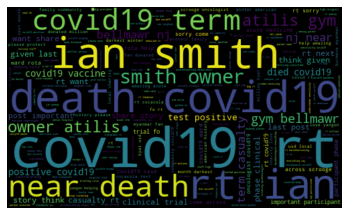

In [113]:
from wordcloud import WordCloud
# word cloud visualization
allWords = ' '.join([twts for twts in tweets_clean['text']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Jaccard Distance:
La distance de Jaccard, qui mesure la dissemblance entre deux ensembles d'échantillons (A et B). Il est défini comme la différence des tailles de l'union et de l'intersection de deux ensembles divisée par la taille de l'union des ensembles.

In [70]:
Dans cette tâche, un tweet peut être considéré comme un ensemble non ordonné de mots tels que {a, b, c}. Par "non ordonné", nous entendons que {a, b, c} = {b, a, c} = {a, c, b} = ...
Une distance de Jaccard Dist (A, B) entre les tweet les propriétés suivantes:

Il est petit si les tweets A et B sont similaires.
C'est grand s'ils ne sont pas similaires.
Il vaut 0 s'ils sont identiques.
Il vaut 1 s'ils sont complètement différents (c.-à-d. Pas de mots qui se chevauchent).

SyntaxError: invalid syntax (<ipython-input-70-b1c52aa598cc>, line 1)

In [114]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = 'english'
)
tfidf.fit(tweets_clean.text)
text = tfidf.transform(tweets_clean.text)

In [115]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
vect = CountVectorizer(max_features=10000, max_df=.15)
X = vect.fit_transform(tweets_clean.text)

from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, learning_method="batch",
                                max_iter=25, random_state=0)
# We build the model and transform the data in one step
# Computing transform takes some time,
# and we can save time by doing both at once
document_topics = lda.fit_transform(X)

print("lda.components_.shape: {}".format(lda.components_.shape))

lda.components_.shape: (10, 10000)


In [116]:

# for each topic (a row in the components_), sort the features (ascending).
# Invert rows with [:, ::-1] to make sorting descending
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
# get the feature names from the vectorizer:
feature_names = np.array(vect.get_feature_names())

In [117]:
import mglearn
# Print out the 10 topics:
mglearn.tools.print_topics(topics=range(5), feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
positive      death         help          vaccine       case          
test          300000        across        show          new           
cocacola      gym           come          everyone      december      
bjp           owner         acute         hospital      amp           
president     nj            medicine      coronavirus   parliament    
tested        ian           amazing       pandemic      recovery      
get           near          sorry         work          people        
people        term          ward          poor          death         
bill          smith         scrooge       month         total         
govt          casualty      rota          christmas     2020          




Recherche de clusters optimaux
Le clustering est une opération non supervisée et KMeans nécessite que nous spécifions le nombre de clusters. Une approche simple consiste à tracer le SSE pour une plage de tailles de cluster. Nous recherchons le «coude» où l'ESS commence à se stabiliser. MiniBatchKMeans introduit du bruit, j'ai donc augmenté la taille des lots et des init. Malheureusement, la mise en œuvre régulière de Kmeans est trop lente. Vous remarquerez que différents états aléatoires généreront différents graphiques. Ici, j'ai choisi 14 clusters.

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


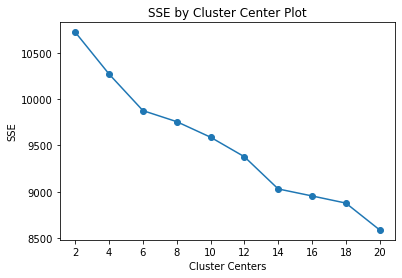

In [96]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 20)

In [71]:
clusters = MiniBatchKMeans(n_clusters=5, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

Tracer des clusters
Ici, nous traçons les clusters générés par notre opération KMeans. Un graphique utilise PCA qui est meilleur pour capturer la structure globale des données. L'autre utilise TSNE qui est meilleur pour capturer les relations entre voisins. Afin d'accélérer le processus avec TSNE, j'échantillonne sur 3000 documents et j'effectue d'abord une réduction de dimension PCA 50 sur les données. Ensuite, je montre un nuage de points échantillonnant davantage l'échantillon jusqu'à 300 points.

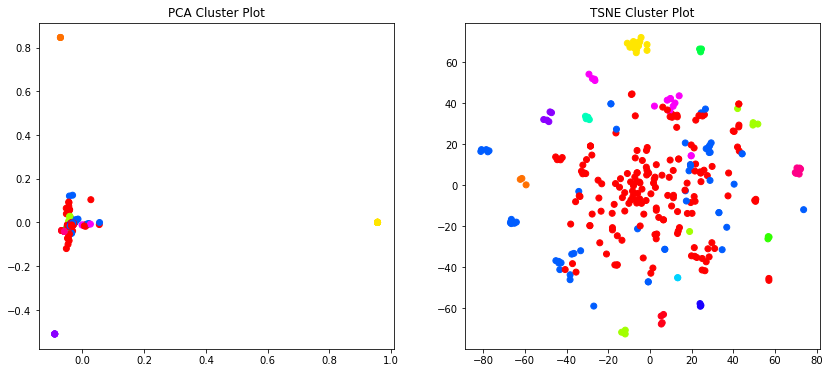

In [130]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)

Mots clés principaux
Enfin, nous allons parcourir les clusters et imprimer les meilleurs mots-clés en fonction de leur score TFIDF pour voir si nous pouvons repérer des tendances. Je vais le faire en calculant une valeur moyenne pour toutes les dimensions dans Pandas, regroupées par l'étiquette de cluster. En utilisant numpy, trouver les premiers mots consiste simplement à trier les valeurs moyennes de chaque ligne et à prendre le N supérieur.

Vous pouvez voir que nous avons un très bon résultat. Des sujets tels que l'exploitation des enfants, la fraude fiscale, les droits civils et les problèmes environnementaux peuvent être déduits des principaux mots clés. D'autres approches intéressantes à ce sujet pourraient inclure la modélisation de sujets LDA ou éventuellement le travail avec des incorporations de mots pré-entraînées.

In [129]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, tfidf.get_feature_names(), 10)


Cluster 0
mask,death,icu,dont,day,covid,amp,people,covid19,rt

Cluster 1
rt,covid19,month,family,american,community,protect,winter,history,darkest

Cluster 2
owner,nj,ian,300000,smith,term,near,bellmawr,atilis,casualty

Cluster 3
quiet,nadda,jpnadda,rt,president,bjp,covid19,cocacola,test,positive

Cluster 4
endangerment,ending,emerging,zoom,rt,say,stop,listening,epidemiologist,politicized

Cluster 5
crew,hobi,jimin,likewise,jungkook,yoongi,jin,namjoon,taehyung,amp

Cluster 6
virus,video,body,bag,loeffler,invested,briefing,receiving,classified,perdue

Cluster 7
end,general,beginning,saving,operation,perna,ows,speed,warp,say

Cluster 8
sensitivity,consequence,understands,coronavirus,rn,hospital,died,rt,vaccine,covid19

Cluster 9
mask,nurse,die,old,distance,anybody,marathonrunning,29year,ventilate,airb

Cluster 10
think,trial,share,story,clinical,given,post,fo,phase,participant

Cluster 11
rt,total,today,2020,ai,new,python,machinelearning,datascience,case

Cluster 12
love,helping,donated

In [74]:
!pip install plotly